### Training a Model

In [1]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, epochs=5, workers=3)

At its core, word2vec model parameters are stored as matrices (NumPy arrays). Each array is `#vocabulary` (controlled by the min_count parameter) times vector size (the vector_size parameter) of floats (single precision aka 4 bytes).

Three such matrices are held in RAM (work is underway to reduce that number to two, or even one). So if your input contains 100,000 unique words, and you asked for layer vector_size=200, the model will require approx. `100,000 * 200 * 4 * 3 bytes = ~229MB`.

(There’s a little extra memory needed for storing the vocabulary tree.)

In [2]:
model.wv['sentence']

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [3]:
model.wv['Advanced']

KeyError: "Key 'Advanced' not present"

In [5]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '"+word+"' does not appear in this model")

In [6]:
get_word("Advanced")

The word 'Advanced' does not appear in this model


### Online training / Resuming training

In [7]:
more_sentences = [
    ['Advanced', 'users', 'can', 'load', 'a', 'model',
     'and', 'continue', 'training', 'it', 'with', 'more', 'sentences',"ds"],
]

model.build_vocab(more_sentences, update=True)
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)
get_word("Advanced")


array([ 7.6966463e-03,  9.1206422e-03,  1.1355019e-03, -8.3250795e-03,
        8.4250160e-03, -3.6962307e-03,  5.7421732e-03,  4.3915794e-03,
        9.6899448e-03, -9.2934975e-03,  9.2084054e-03, -9.2815282e-03,
       -6.9077122e-03, -9.1021946e-03, -5.5471100e-03,  7.3688962e-03,
        9.1644777e-03, -3.3253515e-03,  3.7230505e-03, -3.6252034e-03,
        7.8814710e-03,  5.8668759e-03,  2.0861626e-07, -3.6286747e-03,
       -7.2243060e-03,  4.7686161e-03,  1.4529788e-03, -2.6131857e-03,
        7.8378068e-03, -4.0496145e-03, -9.1489861e-03, -2.2554707e-03,
        1.2514711e-04, -6.6392552e-03, -5.4866159e-03, -8.4997769e-03,
        9.2298733e-03,  7.4240281e-03, -2.9524326e-04,  7.3676636e-03,
        7.9507884e-03, -7.8357337e-04,  6.6120909e-03,  3.7675237e-03,
        5.0768424e-03,  7.2529912e-03, -4.7393893e-03, -2.1855331e-03,
        8.7312341e-04,  4.2362059e-03,  3.3043313e-03,  5.0958274e-03,
        4.5864857e-03, -8.4385090e-03, -3.1838394e-03, -7.2367596e-03,
      

### Vocabulary Length

In [8]:
len(model.wv)

26

In [9]:
model.wv.index_to_key

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first',
 'Advanced',
 'users',
 'can',
 'load',
 'a',
 'model',
 'continue',
 'training',
 'it',
 'with',
 'sentences',
 'ds']

### Saving and Loading 

model.save guarda o modelo: na fase de implementação guardamos porque queremos treina-lo
model.vw.save grava só os word vectors e dá para ver os wv mas nao da para voltar a treinar.- fase final porque nao queremos treinar mais.

In [11]:
model.save("models/word2vec.model")

model = Word2Vec.load("models/word2vec.model")


In [12]:
# Store just the words + their trained embeddings.

from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save("models/word2vec.wordvectors")

wv = KeyedVectors.load("models/word2vec.wordvectors")
vector = wv['sentence'] 
print(vector)

[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

By default, it uses pickle internally, optionally mmap‘ing the model’s internal large NumPy matrices into virtual memory directly from disk files, for inter-process memory sharing.

In addition, you can load models created by the original C tool, both using its text and binary formats:

In [13]:
word_vectors.save_word2vec_format('models/vectors.txt', binary=False)
word_vectors.save_word2vec_format('models/vectors.bin', binary=True)

In [14]:
model_txt = KeyedVectors.load_word2vec_format('models/vectors.txt', binary=False)
model_bin = KeyedVectors.load_word2vec_format('models/vectors.bin', binary=True)

### Available Models

In [15]:
import gensim.downloader
# Show all available models in gensim-data
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [25]:
# Download the "glove-twitter-25" embeddings
# model_wv = gensim.downloader.load('glove-twitter-25')
model_wv = gensim.downloader.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


### Similarity

In [17]:
model_wv.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [18]:
model_wv.most_similar('obama')

[('romney', 0.9566564559936523),
 ('president', 0.9400959610939026),
 ('barack', 0.9376799464225769),
 ('clinton', 0.9285898804664612),
 ('says', 0.9087842702865601),
 ('bill', 0.9080009460449219),
 ('claims', 0.9074634909629822),
 ('hillary', 0.8889248371124268),
 ('talks', 0.8864543437957764),
 ('government', 0.8833804130554199)]

In [19]:
print(model_wv.similarity("olive","tree"))
print(model_wv.similarity("olive","animal"))
print(model_wv.similarity("olive","house"))


0.8198055
0.5063875
0.6669966


In [20]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model_wv.similarity(w1, w2)))

car 	 minivan 	 0.50
car 	 bicycle 	 0.70
car 	 airplane 	 0.73
car 	 cereal 	 0.54
car 	 communism 	 0.11


### Intruso - Which one is the odd one out in this list?

In [21]:
model_wv.doesnt_match(["cat","dog","france"])

'france'

In [ ]:
model_wv = gensim.downloader.load('word2vec-google-news-300')
# treinado pelo Google (3 milhões de palavras, 300 dimensões).
model_wv.doesnt_match(["Portugal","France","Russia"])

'Russia'

In [27]:
model_wv.doesnt_match(["Portugal","France","Russia","U.K", "Germany", "Italy"])

'Russia'

### Analogies

<img src="analogia.png">

In [28]:
result = model_wv.most_similar(positive=['woman', 'king'], negative=['man'])
print(result[0])

('queen', 0.7118193507194519)


In [ ]:
model_wv1 = gensim.downloader.load('glove-twitter-25')
# treinado em tweets (25 dimensões, menor e mais leve)
result = model_wv1.most_similar(positive=['hamburger', 'canada'], negative=['u.s'])
print(result[0])

('sauce', 0.8373295068740845)


In [31]:
model_wv.most_similar("portugal", topn=50)

[('juventus', 0.7192183136940002),
 ('real_madrid', 0.7122810482978821),
 ('barcelona', 0.7077295780181885),
 ('lazio', 0.6987712383270264),
 ('spain', 0.6940690875053406),
 ('pirlo', 0.6873648762702942),
 ('totti', 0.6860609650611877),
 ('del_piero', 0.684780478477478),
 ('bayern', 0.6827599406242371),
 ('robben', 0.682552695274353),
 ('xavi', 0.6819191575050354),
 ('madrid', 0.6804027557373047),
 ('diego', 0.6774610280990601),
 ('ronaldinho', 0.6738953590393066),
 ('lampard', 0.6738166809082031),
 ('messi', 0.6719294190406799),
 ('sweden', 0.6717909574508667),
 ('sneijder', 0.6693747639656067),
 ("eto'o", 0.6692990064620972),
 ('tottenham', 0.6665034294128418),
 ('aston_villa', 0.6663848757743835),
 ('forza', 0.666372537612915),
 ('robinho', 0.6662201881408691),
 ('mourinho', 0.6657170653343201),
 ('de_rossi', 0.6655007600784302),
 ('raul', 0.6653153896331787),
 ('Real_madrid', 0.6641711592674255),
 ('drogba', 0.6631304025650024),
 ('torres', 0.6630793213844299),
 ('benzema', 0.66301

In [44]:
model_wv.most_similar("biomedical", topn=50)

[('biotechnology', 0.6775607466697693),
 ('biomedical_research', 0.6758586168289185),
 ('bioscience', 0.6623156666755676),
 ('biotechnical', 0.6351296305656433),
 ('nanotechnology', 0.6297926306724548),
 ('bionanotechnology', 0.6277046203613281),
 ('nanomedicine', 0.6130743026733398),
 ('proteomics_genomics', 0.6096312999725342),
 ('regenerative_medicine', 0.6095671057701111),
 ('biomedicine', 0.6059288382530212),
 ('bioinformatics', 0.6059272289276123),
 ('nanobiotech', 0.6014373898506165),
 ('informatics', 0.6013841032981873),
 ('biotech', 0.6004458665847778),
 ('biosciences', 0.5992570519447327),
 ('therapeutics_diagnostics', 0.595718264579773),
 ('biomed', 0.592113196849823),
 ('neurotechnology', 0.5892913341522217),
 ('neuroscience', 0.5850028991699219),
 ('nanobiotechnology', 0.581845760345459),
 ('nanotech', 0.5816829800605774),
 ('nanoscience', 0.5796989798545837),
 ('biomedical_sciences', 0.5786738991737366),
 ('photonics', 0.5767332315444946),
 ('Biomedical', 0.57604360580444

In [32]:
def analogy( x2, y1, x1):
    result = model_wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [33]:
analogy('fantastic', 'bad', 'good')

'horrible'

In [34]:
analogy('france', 'japanese', 'japan')

'french'

In [35]:
analogy('german', 'japanese', 'japan')

'swedish'

In [36]:
analogy('canada', 'japanese', 'japan')

'canadian'

In [37]:
analogy('cat', 'oink', 'pig')

'miaowing'

In [38]:
analogy('dog', 'miaowing', 'cat')

'barking_loudly'

In [48]:
analogy('portugal', 'paris', 'france')

'wiv'

In [49]:
analogy('spain', 'paris', 'france')

'madrid'

### Visualisation

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None):
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

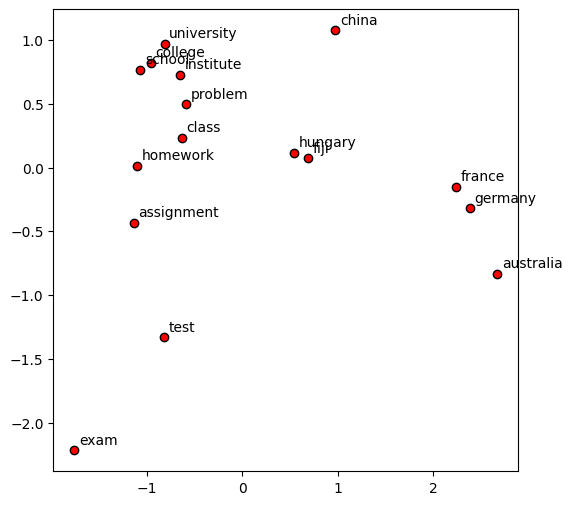

In [51]:
words2 =  ['france', 'germany', 'hungary', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute']
display_pca_scatterplot(model_wv,words2)

grupo semânticos: educação e países

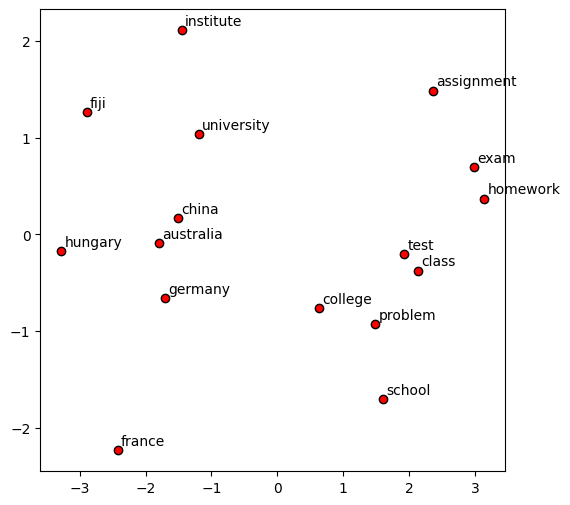

In [ ]:
display_pca_scatterplot(model_wv1,words2)

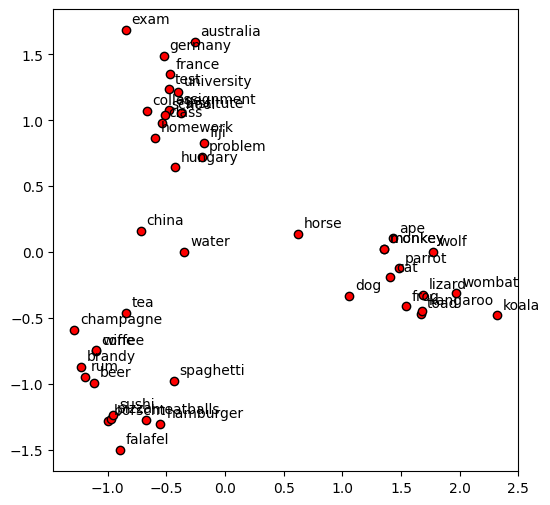

In [41]:
words =  ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute']
display_pca_scatterplot(model_wv,words)

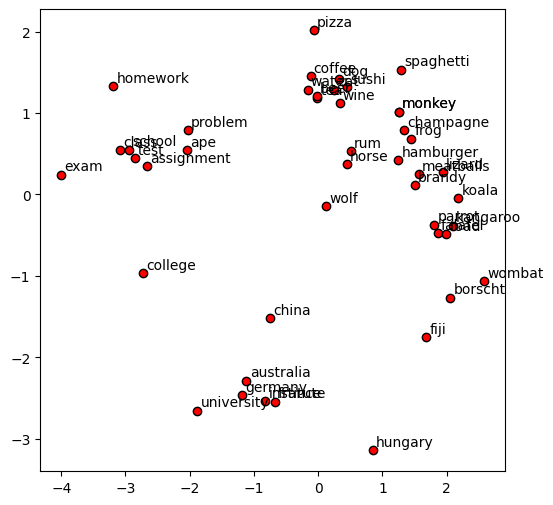

In [53]:
display_pca_scatterplot(model_wv1,words)

In [42]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, words):
    
    arr = np.empty((0,300), dtype='f')

    # get close words
    
    for word in words:
        wrd_vector = model[word]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=10,n_iter=5000)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


c:\Users\Catarina Nunes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


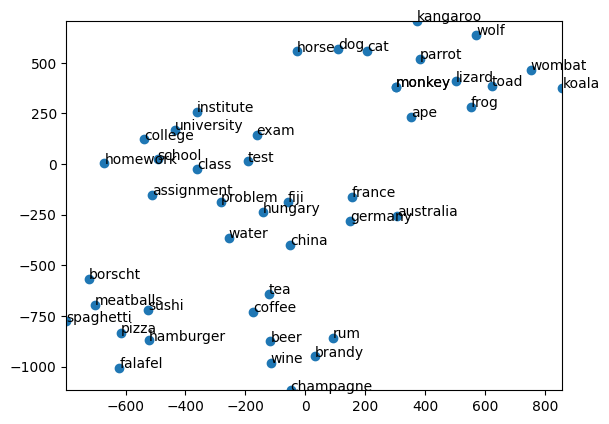

In [43]:
display_closestwords_tsnescatterplot(model_wv, words)

PCA vs TSNE - Algoritmos de Redução Dimensional

PCA:
- Método linear e rápido.
- Preserva a estrutura global (variância dos dados).
- Ideal para uma visão geral inicial.

t-SNE:
- Método não-linear e mais lento.
- Foca em preservar distâncias locais (agrupamentos).
- Melhor para identificar clusters complexos.
